## Importing the libraries

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Loading the data

In [142]:
heart_disease_data = pd.read_csv('heart_disease_data.csv')

In [143]:
heart_disease_data.shape

(303, 14)

In [144]:
heart_disease_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration

In [145]:
heart_disease_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [146]:
heart_disease_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [147]:
heart_disease_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

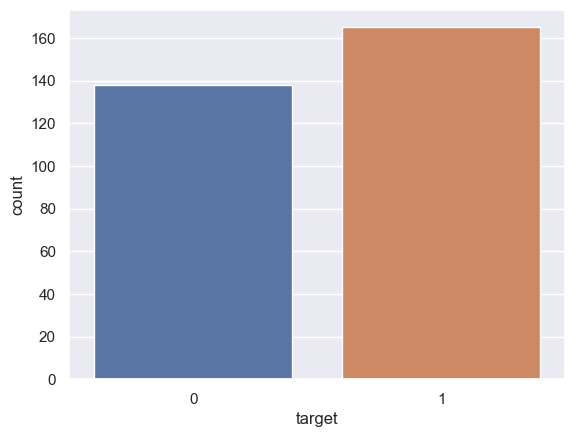

In [148]:
sns.countplot(x='target', data=heart_disease_data)
plt.show()

In [149]:
heart_disease_data[['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'target']].groupby('target').mean()

,age,trestbps,chol,restecg,thalach,oldpeak
target,,,,,,
0,56.601449,134.398551,251.086957,0.449275,139.101449,1.585507
1,52.496970,129.303030,242.230303,0.593939,158.466667,0.583030


In [150]:
heart_disease_data['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [151]:
sns.set()

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


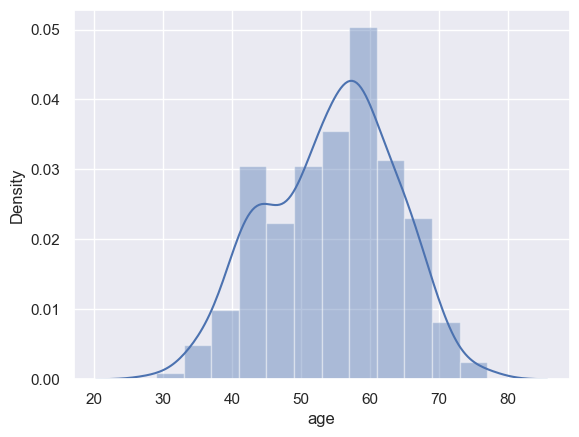

In [152]:
sns.distplot(heart_disease_data['age'])
plt.show()

In [153]:
heart_disease_data['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

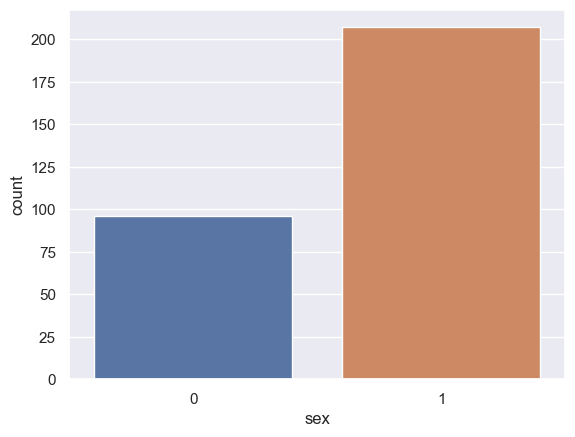

In [154]:
sns.countplot(x='sex', data=heart_disease_data)
plt.show()

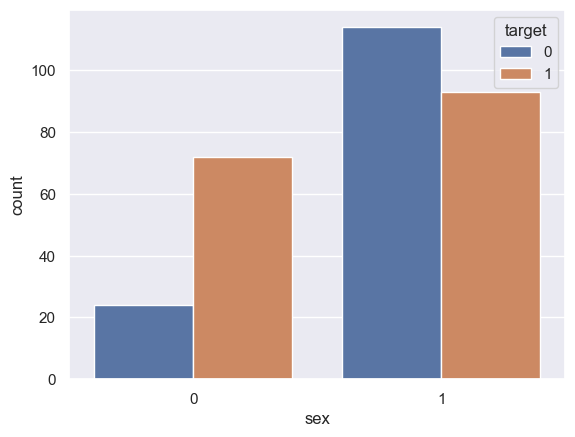

In [155]:
sns.countplot(x='sex', hue='target', data=heart_disease_data)
plt.show()

In [156]:
heart_disease_data['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

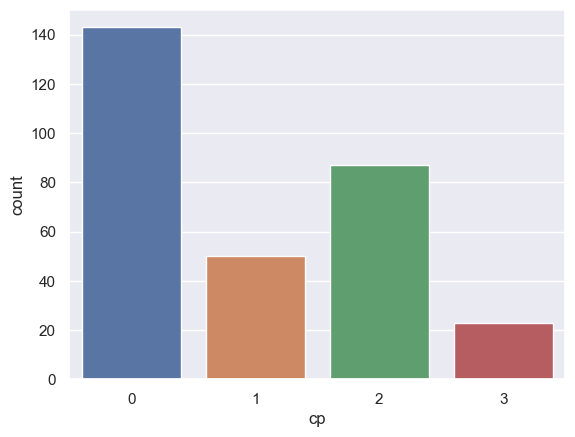

In [157]:
sns.countplot(x='cp', data=heart_disease_data)
plt.show()

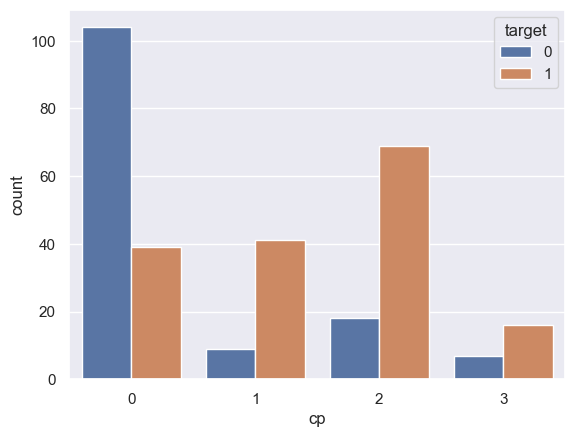

In [158]:
sns.countplot(x='cp', hue='target', data=heart_disease_data)
plt.show()

In [159]:
heart_disease_data['trestbps'].describe()

count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


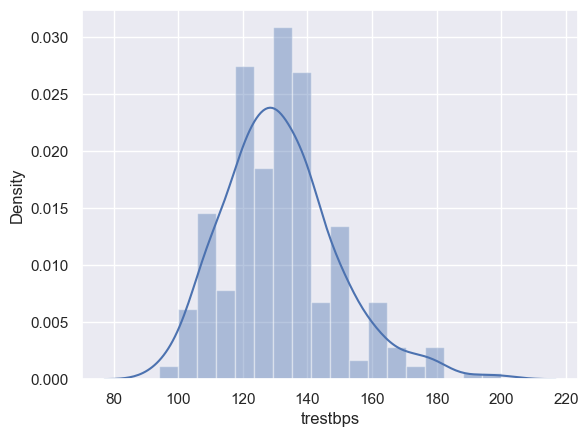

In [160]:
sns.distplot(heart_disease_data['trestbps'])
plt.show()

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


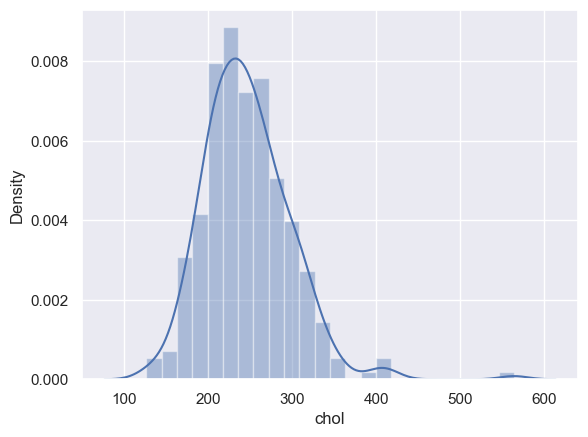

In [161]:
sns.distplot(heart_disease_data['chol'])
plt.show()

In [162]:
heart_disease_data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

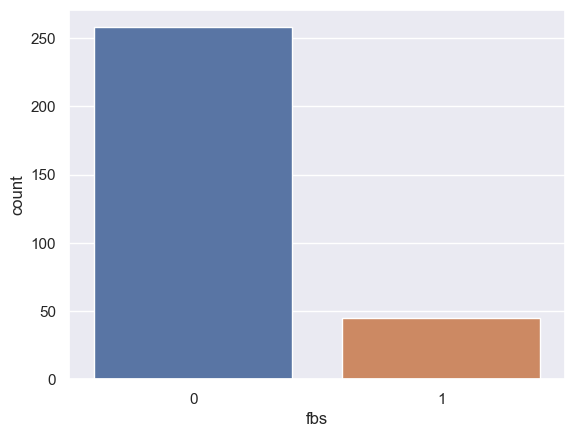

In [163]:
sns.countplot(x='fbs', data=heart_disease_data)
plt.show()

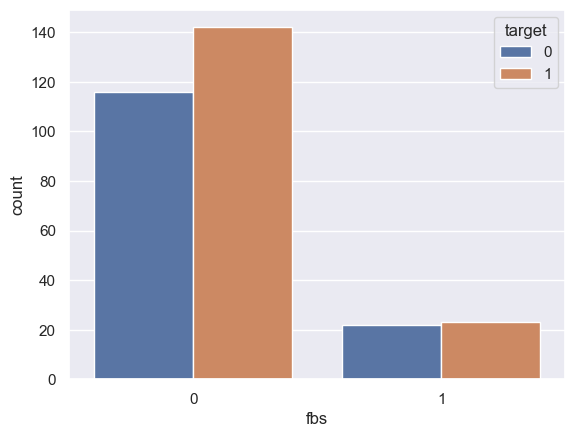

In [164]:
sns.countplot(x='fbs', hue='target', data=heart_disease_data)
plt.show()

In [165]:
heart_disease_data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

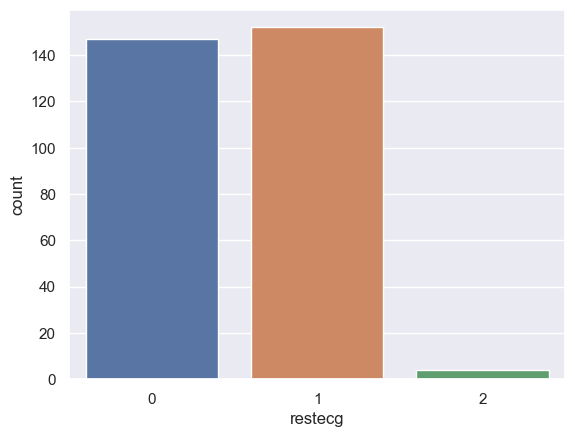

In [166]:
sns.countplot(x='restecg', data=heart_disease_data)
plt.show()

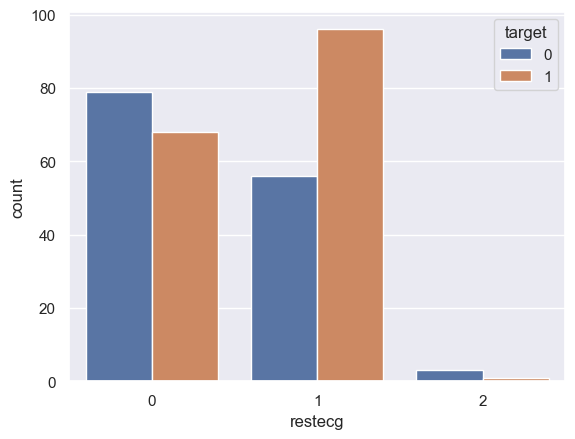

In [167]:
sns.countplot(x='restecg', hue='target', data=heart_disease_data)
plt.show()

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


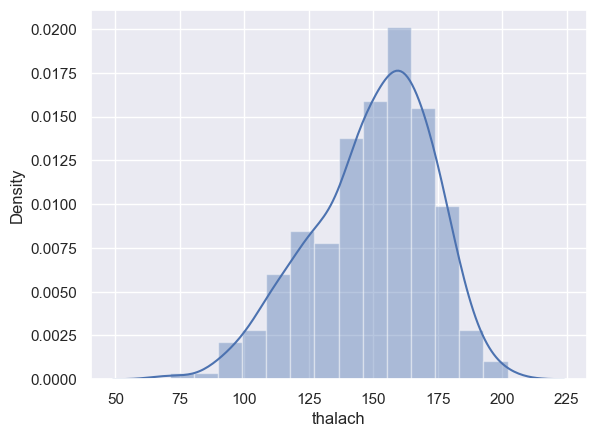

In [168]:
sns.distplot(heart_disease_data['thalach'])
plt.show()

In [169]:
heart_disease_data['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

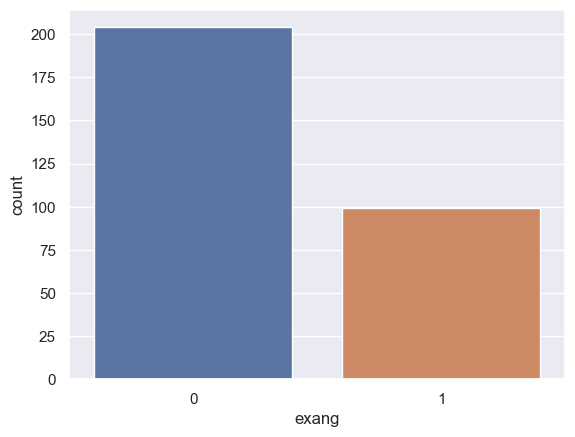

In [170]:
sns.countplot(x='exang', data=heart_disease_data)
plt.show()

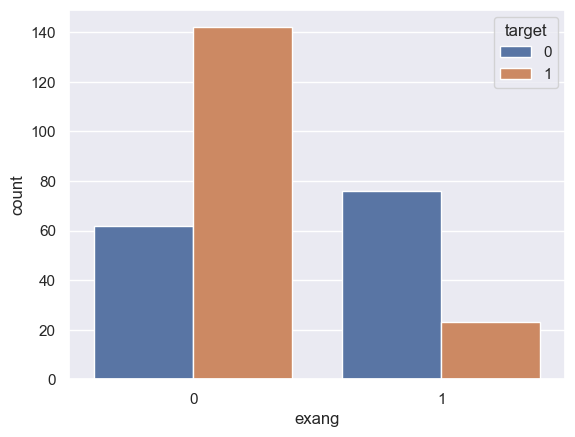

In [171]:
sns.countplot(x='exang', hue='target', data=heart_disease_data)
plt.show()

In [172]:
# 0   age       303 non-null    int64  
#  1   sex       303 non-null    int64  
#  2   cp        303 non-null    int64  
#  3   trestbps  303 non-null    int64  
#  4   chol      303 non-null    int64  
#  5   fbs       303 non-null    int64  
#  6   restecg   303 non-null    int64  
#  7   thalach   303 non-null    int64  
#  8   exang     303 non-null    int64  
#  9   oldpeak   303 non-null    float64
#  10  slope     303 non-null    int64  
#  11  ca        303 non-null    int64  
#  12  thal      303 non-null    int64  
#  13  target    303 non-null    int64  

C:\Users\anupa\.android\trial\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


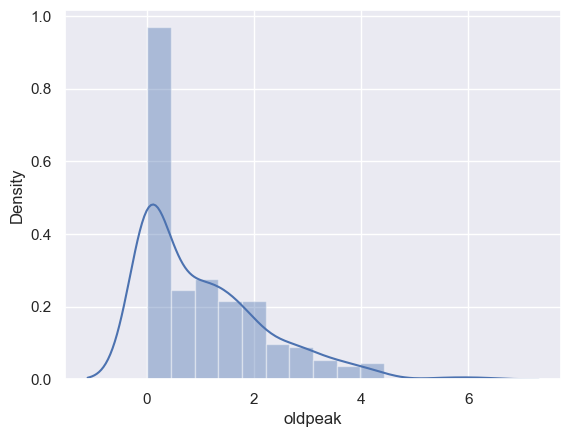

In [173]:
sns.distplot(heart_disease_data['oldpeak'])
plt.show()

In [174]:
heart_disease_data['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [175]:
heart_disease_data['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

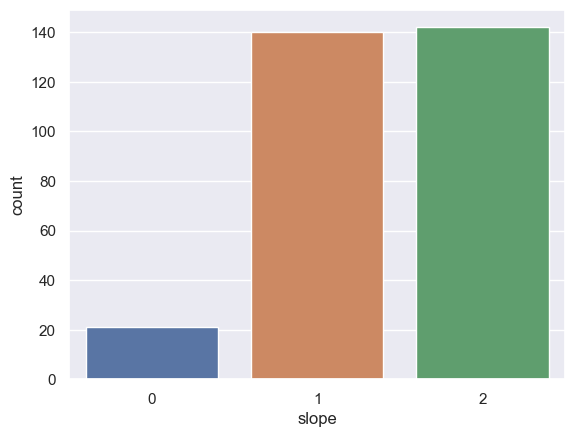

In [176]:
sns.countplot(x='slope', data=heart_disease_data)
plt.show()

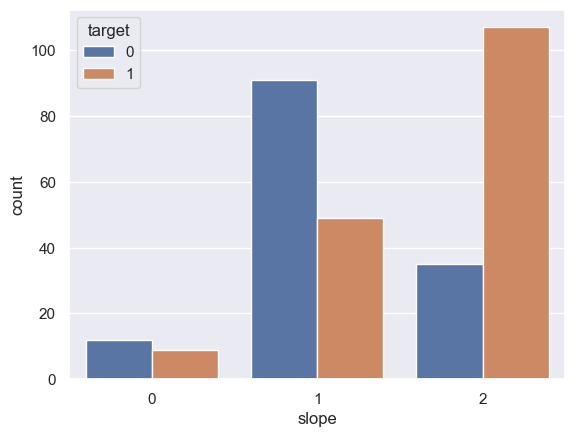

In [177]:
sns.countplot(x='slope', hue='target', data=heart_disease_data)
plt.show()

In [178]:
heart_disease_data['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

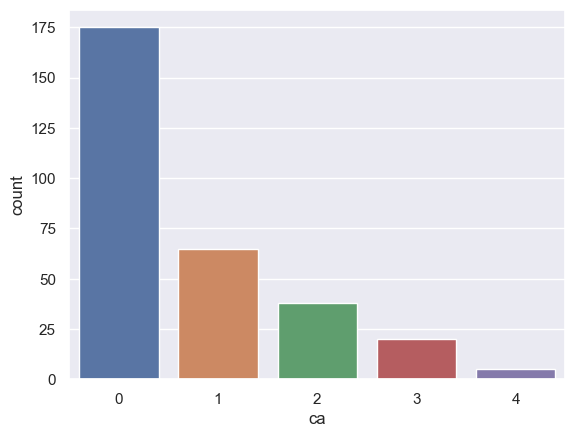

In [179]:
sns.countplot(x='ca', data=heart_disease_data)
plt.show()

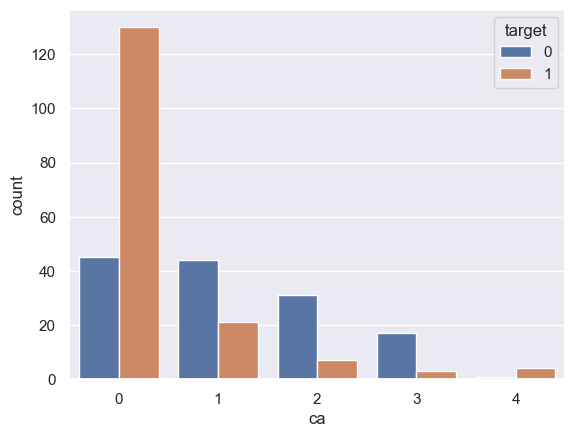

In [180]:
sns.countplot(x='ca', hue='target', data=heart_disease_data)
plt.show()

In [181]:
heart_disease_data['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

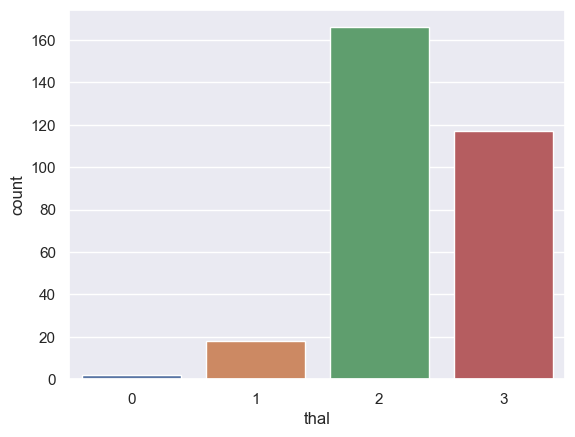

In [182]:
sns.countplot(x='thal', data=heart_disease_data)
plt.show()

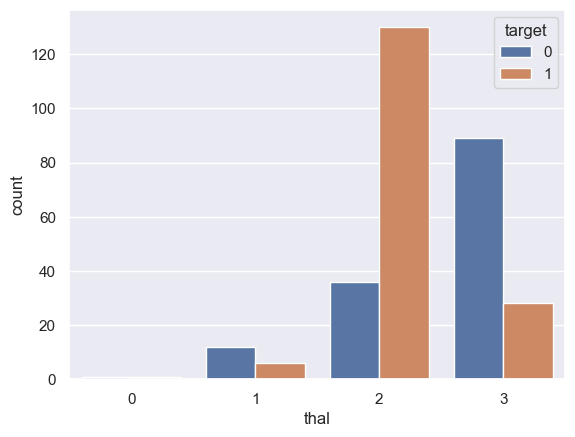

In [183]:
sns.countplot(x='thal', hue='target', data=heart_disease_data)
plt.show()

## Splitting the features and labels

In [184]:
X = heart_disease_data.drop(columns=['target'])
y = heart_disease_data['target']

## Splitting the dataset into training set and test set

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Scaling the dataset

In [191]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

## Training and Model Evaluation

In [192]:
classifiers = [
    {
        'name': 'Logistic Regression',
        'classifier': LogisticRegression(max_iter=2000),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'solver': ['liblinear', 'lbfgs']
        },
        'train_data': 'X_train_scaled'
    },
    {
        'name': 'Decision Tree',
        'classifier': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10],
            'min_samples_split': [2, 5, 10]
        },
        'train_data': 'X_train'
    },
    {
        'name': 'Support Vector Machine',
        'classifier': SVC(max_iter=2000),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf']
        },
        'train_data': 'X_train_scaled'
    },
    {
        'name': 'Random Forest',
        'classifier': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 5, 10]
        },
        'train_data': 'X_train'
    },
    {
        'name': 'Gaussian Naive Bayes',
        'classifier': GaussianNB(),
        'params': {},
        'train_data': 'X_train'
    }
]


In [193]:
results_df = pd.DataFrame(columns=['Classifier', 'Best Parameters', 'Accuracy'])

In [194]:
for classifier in classifiers:
    if classifier['train_data'] == 'X_train':
        X_train_data = X_train
    elif classifier['train_data'] == 'X_train_scaled':
        X_train_data = X_train_scaled
    else:
        raise ValueError("Invalid train_data value. Must be 'X_train' or 'X_train_scaled'.")
    
    grid_search = GridSearchCV(classifier['classifier'], classifier['params'], cv=5)
    grid_search.fit(X_train_data, y_train)
    best_classifier = grid_search.best_estimator_
    if classifier['train_data'] == 'X_train':
        y_pred = best_classifier.predict(X_test)
    elif classifier['train_data'] == 'X_train_scaled':
        X_test_scaled = scaler.transform(X_test)
        y_pred = best_classifier.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the results to the DataFrame
    results_df = results_df.append({
        'Classifier': classifier['name'],
        'Best Parameters': grid_search.best_params_,
        'Accuracy': accuracy
    }, ignore_index=True)


C:\Users\anupa\AppData\Local\Temp\ipykernel_5400\4204547685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\AppData\Local\Temp\ipykernel_5400\4204547685.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append({
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\svm\_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\anupa\.android\trial\lib\site-packages\sklearn\svm\_base.py:284: Converge

In [195]:
results_df

,Classifier,Best Parameters,Accuracy
0,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.786885
1,Decision Tree,"{'max_depth': 10, 'min_samples_split': 5}",0.721311
2,Support Vector Machine,"{'C': 1.0, 'kernel': 'linear'}",0.786885
3,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.803279
4,Gaussian Naive Bayes,{},0.819672


In [196]:
results_df.sort_values(by='Accuracy', ascending=False)

,Classifier,Best Parameters,Accuracy
4,Gaussian Naive Bayes,{},0.819672
3,Random Forest,"{'max_depth': None, 'n_estimators': 200}",0.803279
0,Logistic Regression,"{'C': 0.1, 'solver': 'lbfgs'}",0.786885
2,Support Vector Machine,"{'C': 1.0, 'kernel': 'linear'}",0.786885
1,Decision Tree,"{'max_depth': 10, 'min_samples_split': 5}",0.721311


## Building Best Model

In [197]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### Accuracy on training set

In [198]:
y_pred_train = model.predict(X_train)
print(accuracy_score(y_train, y_pred_train))

0.8429752066115702


### Accuracy on test set

In [199]:
y_pred_test = model.predict(X_test)
print(accuracy_score(y_test, y_pred_test))

0.819672131147541


It does not seem that there is any overfitting in this model.